## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [15]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

In [16]:
flights = pd.read_csv('flights.csv', sep = ',',index_col=0)
flights.head(3)

,fl_date,mkt_carrier_fl_num,op_unique_carrier,origin,origin_city_name,origin_airport_id,dest,dest_city_name,dest_airport_id,distance,...,arr_time,taxi_out,crs_elapsed_time,actual_elapsed_time,dep_delay,arr_delay,day_of_week,month,year,peak_hours
0,2019-03-23,5071,9E,CVG,"Cincinnati, OH",11193,DCA,"Washington, DC",11278,411.0,...,1439.0,12.0,84.0,76.0,4.0,-4.0,5,3,2019,0
1,2019-05-08,3841,ZW,ORD,"Chicago, IL",13930,MSN,"Madison, WI",13485,109.0,...,908.0,23.0,57.0,59.0,9.0,11.0,2,5,2019,1
2,2019-04-16,434,AA,AUS,"Austin, TX",10423,CLT,"Charlotte, NC",11057,1032.0,...,2046.0,15.0,161.0,156.0,-8.0,-13.0,1,4,2019,0


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

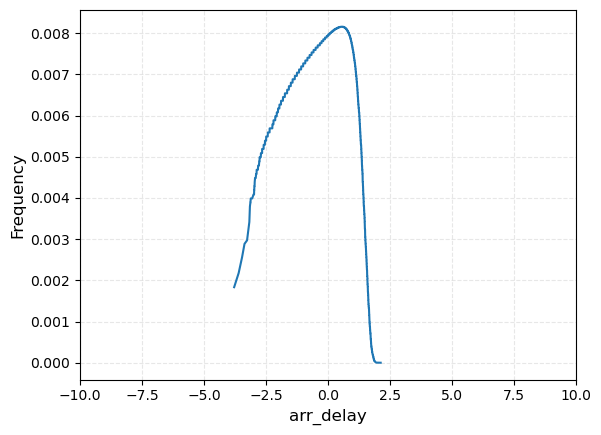

In [17]:
#Generating data frame
x = np.random.normal(0, 1, 20000)
source = {"quantity": ["1"]*20000, "arr_delay": x}
df = pd.DataFrame(source)

# Calculating mean and Stdev of AGW
df_mean = np.mean(flights["arr_delay"])
df_std = np.std(flights["arr_delay"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(flights["arr_delay"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["arr_delay"].sort_values(), pdf)
plt.xlim([-10,10])  
plt.xlabel("arr_delay", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [18]:
flights.groupby('month')['arr_delay'].mean()
# summer months = more traffic = summer vacaction

month
1     3.740277
2     7.264580
3     3.049427
4     3.636638
5     6.472554
6     8.804200
7     9.386364
8     7.979988
9     2.933501
10    4.445962
11    3.196292
12    4.640050
Name: arr_delay, dtype: float64

In [19]:
flights.groupby('month')['arr_delay'].median()

month
1    -7.0
2    -5.0
3    -7.0
4    -6.0
5    -5.0
6    -4.0
7    -5.0
8    -5.0
9    -8.0
10   -6.0
11   -6.0
12   -5.0
Name: arr_delay, dtype: float64

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [20]:
flights.head(3)

,fl_date,mkt_carrier_fl_num,op_unique_carrier,origin,origin_city_name,origin_airport_id,dest,dest_city_name,dest_airport_id,distance,...,arr_time,taxi_out,crs_elapsed_time,actual_elapsed_time,dep_delay,arr_delay,day_of_week,month,year,peak_hours
0,2019-03-23,5071,9E,CVG,"Cincinnati, OH",11193,DCA,"Washington, DC",11278,411.0,...,1439.0,12.0,84.0,76.0,4.0,-4.0,5,3,2019,0
1,2019-05-08,3841,ZW,ORD,"Chicago, IL",13930,MSN,"Madison, WI",13485,109.0,...,908.0,23.0,57.0,59.0,9.0,11.0,2,5,2019,1
2,2019-04-16,434,AA,AUS,"Austin, TX",10423,CLT,"Charlotte, NC",11057,1032.0,...,2046.0,15.0,161.0,156.0,-8.0,-13.0,1,4,2019,0


In [21]:
flights['crs_dep_time_h'] = flights['crs_dep_time'] // 100
flights['crs_dep_time_h']

0        13
1         8
2        17
3         7
4        19
         ..
19995    18
19996    15
19997    14
19998     8
19999    19
Name: crs_dep_time_h, Length: 20000, dtype: int64

In [29]:
time_day = flights.groupby('crs_dep_time_h')['taxi_out'].count()
y = time_day.reset_index()
x = y.sort_values(by='crs_dep_time_h', ascending=False)

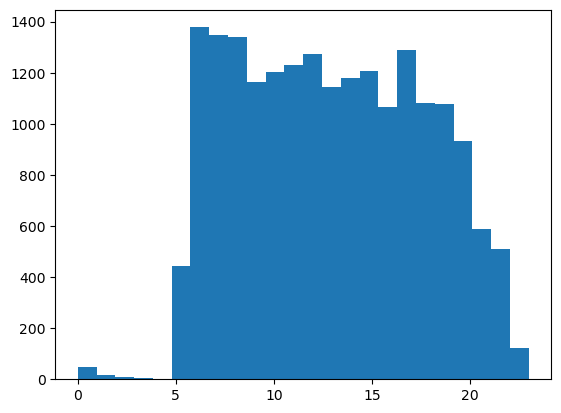

In [30]:
# histogram showing frequency of flights during the day
plt.hist(x.crs_dep_time_h, weights=x.taxi_out, bins=24)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (24, 2) and (20000,)

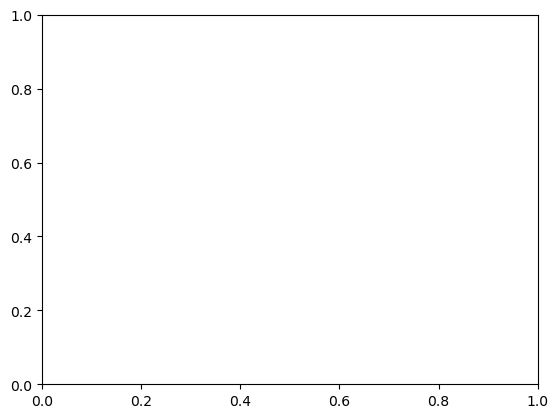

In [31]:
y = flights['dep_delay']

plt.plot(x, y)
  
# naming the x axis
plt.xlabel('x - taxi_out')
# naming the y axis
plt.ylabel('y - dep_delay')
  
# giving a title to my graph
plt.title('taxi_out vs dep_delay')
  
# function to show the plot
plt.show()

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [41]:
flights[flights['dep_delay'] > 0].agg('count')['dep_delay'] / 20000 * 100

33.650000000000006

In [42]:
flights[flights['arr_delay'] > 0].count()['dep_delay'] / 20000 * 100

34.839999999999996

#### **Task 6**: How many states cover 50% of US air traffic? 

In [118]:
flights[['origin_city', 'states_origin']] = flights['origin_city_name'].str.split(',', expand=True)
flights[['dest_city', 'states_dest']] = flights['dest_city_name'].str.split(',', expand=True)

In [119]:
flights[['states_origin']].groupby('states_origin')['states_origin'].count().nlargest(7)#sum()

states_origin
 CA    2220
 TX    1958
 FL    1392
 IL    1239
 GA    1046
 NY     982
 NC     972
Name: states_origin, dtype: int64

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [52]:
flights.head(3)

,fl_date,mkt_carrier_fl_num,op_unique_carrier,origin,origin_city_name,origin_airport_id,dest,dest_city_name,dest_airport_id,distance,...,crs_elapsed_time,actual_elapsed_time,dep_delay,arr_delay,day_of_week,month,year,peak_hours,crs_dep_time_h,fly_faster
0,2019-03-23,5071,9E,CVG,"Cincinnati, OH",11193,DCA,"Washington, DC",11278,411.0,...,84.0,76.0,4.0,-4.0,5,3,2019,0,13,8.0
1,2019-05-08,3841,ZW,ORD,"Chicago, IL",13930,MSN,"Madison, WI",13485,109.0,...,57.0,59.0,9.0,11.0,2,5,2019,1,8,-2.0
2,2019-04-16,434,AA,AUS,"Austin, TX",10423,CLT,"Charlotte, NC",11057,1032.0,...,161.0,156.0,-8.0,-13.0,1,4,2019,0,17,5.0


In [74]:
flights['fly_faster'] = flights['crs_elapsed_time'] - flights['actual_elapsed_time']
faster_delayed = flights[(flights['dep_delay'] > 0) & (flights['fly_faster'] > 0)].agg('count')['fl_date']
slower_delayed = flights[(flights['dep_delay'] > 0) & (flights['fly_faster'] <= 0)].agg('count')['fl_date']

In [75]:
faster_reg = flights[flights['fly_faster'] > 0].agg('count')['fl_date']
slower_reg = flights[flights['fly_faster'] <= 0].agg('count')['fl_date']

In [76]:
total_delayed = faster_delayed + slower_delayed
total_reg = faster_reg + slower_reg

print(f'The percentage of flights that flew faster with departure delay: {faster_delayed/total_delayed * 100}')
print(f'The percentage of flights that flew faster with no delay: {faster_reg/total_reg * 100}')

The percentage of flights that flew faster with departure delay: 69.93434795583407
The percentage of flights that flew faster with no delay: 70.62929936305733


Planes do not fly faster when there is a departure delay.

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [78]:
# short is < 3 hours, medium between 3 and 6 hours, long > 6 hours
condition = [
    (flights['crs_elapsed_time'] < 180),
    (flights['crs_elapsed_time'].between(180, 360,inclusive='both')),
    (flights['crs_elapsed_time'] > 360)
]
code = [0, 1, 2]

flights['length'] = np.select(condition, code)

In [109]:
hauls = flights.groupby('crs_dep_time_h')['length'].value_counts().reset_index(name='count').sort_values('count', ascending=False)

In [115]:
hauls[hauls['length'] == 0].nlargest(1, 'count')

,crs_dep_time_h,length,count
13,6,0,1114


In [116]:
hauls[hauls['length'] == 1].nlargest(1, 'count')

,crs_dep_time_h,length,count
20,8,1,302


In [117]:
hauls[hauls['length'] == 2].nlargest(1, 'count')

,crs_dep_time_h,length,count
48,17,2,37


#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [139]:
flights.groupby(by= ['op_unique_carrier', 'month']).agg('total_monthly_dep_delay'= ('dep_delay', 'sum'),
                                                        'total_monthly_arr_delay'= ('arr_delay', 'sum'))

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (Temp/ipykernel_11244/3525649168.py, line 1)

,fl_date,mkt_carrier_fl_num,op_unique_carrier,origin,origin_city_name,origin_airport_id,dest,dest_city_name,dest_airport_id,distance,...,peak_hours,crs_dep_time_h,fly_faster,length,origin_city,states_origin,dest_city,states_dest,total_monthly_dep_delay,total_monthly_arr_delay
0,2019-03-23,5071,9E,CVG,"Cincinnati, OH",11193,DCA,"Washington, DC",11278,411.0,...,0,13,8.0,0,Cincinnati,OH,Washington,DC,197.0,-218.0
1,2019-05-08,3841,ZW,ORD,"Chicago, IL",13930,MSN,"Madison, WI",13485,109.0,...,1,8,-2.0,0,Chicago,IL,Madison,WI,644.0,348.0
2,2019-04-16,434,AA,AUS,"Austin, TX",10423,CLT,"Charlotte, NC",11057,1032.0,...,0,17,5.0,0,Austin,TX,Charlotte,NC,1372.0,1043.0
3,2018-01-12,815,DL,DTW,"Detroit, MI",11433,ORD,"Chicago, IL",13930,235.0,...,0,7,23.0,0,Detroit,MI,Chicago,IL,578.0,306.0
4,2018-01-08,258,WN,RDU,"Raleigh/Durham, NC",14492,STL,"St. Louis, MO",15016,667.0,...,0,19,14.0,0,Raleigh/Durham,NC,St. Louis,MO,416.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2019-12-28,2753,AA,DFW,"Dallas/Fort Worth, TX",11298,DTW,"Detroit, MI",11433,986.0,...,0,18,12.0,0,Dallas/Fort Worth,TX,Detroit,MI,NaN,NaN
19996,2019-12-05,3432,YX,EWR,"Newark, NJ",11618,RDU,"Raleigh/Durham, NC",14492,416.0,...,1,15,15.0,0,Newark,NJ,Raleigh/Durham,NC,NaN,NaN
19997,2018-06-15,3340,9E,ROC,"Rochester, NY",14576,LGA,"New York, NY",12953,254.0,...,1,14,13.0,0,Rochester,NY,New York,NY,NaN,NaN
19998,2018-06-30,1884,DL,SNA,"Santa Ana, CA",14908,MSP,"Minneapolis, MN",13487,1522.0,...,0,8,10.0,1,Santa Ana,CA,Minneapolis,MN,NaN,NaN
